## Linear algebra

A matrix $A \in \mathbb{R}^{m\times n}$ is a rectangular array of real numbers with $m$ rows and $n$ columns.
To specify a matrix $A$, we specify the values for its $mn$ components $a_{11}, a_{12}, \ldots, a_{mn}$
as a list of lists:

In [176]:
A = Matrix( [[ 2,-3,-8, 7],
             [-2,-1, 2,-7],
             [ 1, 0,-3, 6]] )

Use the square brackets to access the matrix elements or to obtain a submatrix:

In [177]:
A[0,1]         # row 0, col 1 of A

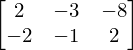

In [178]:
A[0:2,0:3]     # top-left 2x3 submatrix of A

Some commonly used matrices can be created with shortcut methods:

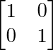

In [179]:
eye(2)         # 2x2 identity matrix

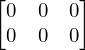

In [180]:
zeros(2, 3)

Standard algebraic operations like 
addition `+`, subtraction `-`, multiplication `*`,
and exponentiation `**` work as expected for `Matrix` objects.
The `transpose` operation flips the matrix through its diagonal:

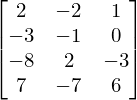

In [181]:
A.transpose()  # the same as A.T

Recall that the transpose is also used to convert row vectors into column vectors and vice versa.

### Row operations

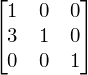

In [182]:
M = eye(3)
M[1,:] = M[1,:] + 3*M[0,:]
M

The notation `M[i,:]` refers to entire rows of the matrix.
The first argument specifies the $0$-based row index,
for example the first row of~`M` is `M[0,:]`.
The code example above implements the row operation $R_2 \gets R_2 + 3R_1$.

To scale a row `i` by constant `c`, use the command `M[i,:] = c*M[i,:]`.

To swap rows `i` and `j`, use can use the `Python` tuple-assignment syntax `M[i,:], M[j,:] = M[j,:], M[i,:]`.

### Reduced row echelon form

The Gauss&mdash;Jordan elimination procedure is a sequence of row operations you can perform
on any matrix to bring it to its *reduced row echelon form* (RREF).
In `SymPy`, matrices have a `rref` method that computes their RREF:

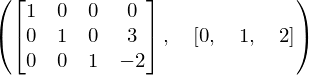

In [183]:
A = Matrix( [[2,-3,-8, 7],
             [-2,-1,2,-7],
             [1, 0,-3, 6]])
A.rref()  # RREF of A, location of pivots

Note the `rref` method returns a tuple of values:
the first value is the RREF of $A$,
while the second tells you the indices of the leading ones (also known as pivots) in the RREF of $A$.
To get just the RREF of $A$, select the $0^\mathrm{th}$ entry form the tuple: `A.rref()[0]`.

### Matrix fundamental spaces

Consider the matrix $A \in \mathbb{R}^{m\times n}$.
The fundamental spaces of a matrix are its column space $\mathcal{C}(A)$, 
its null space $\mathcal{N}(A)$,
and its row space $\mathcal{R}(A)$.
These vector spaces are important when you consider the matrix product
$A\vec{x}=\vec{y}$ as &ldquo;applying&rdquo; the linear transformation $T_A:\mathbb{R}^n \to \mathbb{R}^m$
to an input vector $\vec{x} \in \mathbb{R}^n$ to produce the output vector $\vec{y} \in \mathbb{R}^m$.

**Linear transformations** $T_A:\mathbb{R}^n \to \mathbb{R}^m$ (vector functions)
**are equivalent to $m\times n$ matrices**.
This is one of the fundamental ideas in linear algebra.
You can think of $T_A$ as the abstract description of the transformation 
and $A \in \mathbb{R}^{m\times n}$ as a concrete implementation of $T_A$.
By this equivalence, 
the fundamental spaces of a matrix $A$
tell us facts about the domain and image of the linear transformation $T_A$.
The columns space $\mathcal{C}(A)$ is the same as the image space space $\textrm{Im}(T_A)$ (the set of all possible outputs).
The null space $\mathcal{N}(A)$ is the same as the kernel $\textrm{Ker}(T_A)$ (the set of inputs that $T_A$ maps to the zero vector).
The row space $\mathcal{R}(A)$ is the orthogonal complement of the null space.
Input vectors in the row space of $A$ are in one-to-one correspondence with the output vectors in the column space of $A$.

Okay, enough theory! Let's see how to compute the fundamental spaces of the matrix $A$ defined above.
The non-zero rows in the reduced row echelon form of $A$ are a basis for its row space:

In [184]:
[ A.rref()[0][r,:] for r in A.rref()[1] ]  # R(A)

The column space of $A$ is the span of the columns of $A$ that contain the pivots
in the reduced row echelon form of $A$:

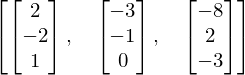

In [185]:
[ A[:,c] for c in  A.rref()[1] ]           # C(A)

Note we took columns from the original matrix $A$ and not its RREF.

To find the null space of $A$, call its `nullspace` method:

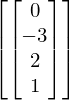

In [186]:
A.nullspace()                              # N(A)

### Determinants

The determinant of a matrix, 
denoted $\det(A)$ or $|A|$, 
is a particular way to multiply the entries of the matrix to produce a single number.

In [187]:
M = Matrix( [[1, 2, 3], 
             [2,-2, 4],
             [2, 2, 5]] )
M.det()

Determinants are used for all kinds of tasks:
to compute areas and volumes,
to solve systems of equations, 
and to check whether a matrix is invertible or not.

### Matrix inverse

For every invertible matrix $A$,
there exists an inverse matrix $A^{-1}$ which *undoes* the effect of $A$.
The cumulative effect of the product of $A$ and $A^{-1}$ (in any order)
is the identity matrix: $AA^{-1}= A^{-1}A=\mathbb{1}$.

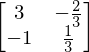

In [188]:
A = Matrix( [[1,2], 
             [3,9]] ) 
A.inv()

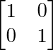

In [189]:
A.inv()*A

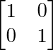

In [190]:
A*A.inv()

The matrix inverse $A^{-1}$ plays the role of division by $A$.

### Eigenvectors and eigenvalues

When a matrix is multiplied by one of its eigenvectors the output
is the same eigenvector multiplied by a constant $A\vec{e}_\lambda =\lambda\vec{e}_\lambda$.
The constant $\lambda$ (the Greek letter *lambda*) is called an *eigenvalue* of $A$.

To find the eigenvalues of a matrix, start from the definition $A\vec{e}_\lambda =\lambda\vec{e}_\lambda$,
insert the identity $\mathbb{1}$, 
and rewrite it as a null-space problem:

$$
A\vec{e}_\lambda =\lambda\mathbb{1}\vec{e}_\lambda
\qquad
\Rightarrow
\qquad
\left(A - \lambda\mathbb{1}\right)\vec{e}_\lambda = \vec{0}.
$$

This equation will have a solution whenever $|A - \lambda\mathbb{1}|=0$.(The invertible matrix theorem states
that a matrix has a non-empty null space if and only if its determinant is zero.)
The eigenvalues of $A \in \mathbb{R}^{n \times n}$, 
denoted $\{ \lambda_1, \lambda_2, \ldots, \lambda_n \}$,\
are the roots of the *characteristic polynomial* $p(\lambda)=|A - \lambda \mathbb{1}|$.

In [191]:
A = Matrix( [[ 9, -2],
             [-2,  6]] )
A.eigenvals()  # same as solve(det(A-eye(2)*x), x)
               # return eigenvalues with their multiplicity

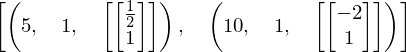

In [192]:
A.eigenvects()

Certain matrices can be written entirely in terms of their eigenvectors and their eigenvalues.
Consider the matrix $\Lambda$ (capital Greek *L*) that has the eigenvalues of the matrix $A$ on the diagonal, 
and the matrix $Q$ constructed from the eigenvectors of $A$ as columns:

$$
\Lambda = 
\begin{bmatrix}
\lambda_1	&  \cdots  &  0 \\
\vdots 	&  \ddots  &  0  \\
0  	&   0      &  \lambda_n
\end{bmatrix}\!,
\ \ 
Q \: = 
\begin{bmatrix}
|  &  & | \\
\vec{e}_{\lambda_1}  & \!  \cdots \! &  \large\vec{e}_{\lambda_n} \\
|  &  & | 
\end{bmatrix}\!,
\ \ 
\textrm{then}
\ \ 
A = Q \Lambda Q^{-1}.
$$

Matrices that can be written this way are called *diagonalizable*.
To *diagonalize* a matrix $A$ is to find its $Q$ and $\Lambda$ matrices:

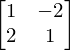

In [193]:
Q, L = A.diagonalize()
Q            # the matrix of eigenvectors as columns 

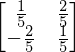

In [194]:
Q.inv()

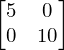

In [195]:
L            # the matrix of eigenvalues

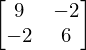

In [196]:
Q*L*Q.inv()  # eigendecomposition of A

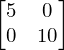

In [197]:
Q.inv()*A*Q  # obtain L from A and Q

Not all matrices are diagonalizable.
You can check if a matrix is diagonalizable by calling its `is_diagonalizable` method:

In [198]:
A.is_diagonalizable()

True

In [199]:
B = Matrix( [[1, 3],
            [0, 1]] )
B.is_diagonalizable()

False

In [200]:
B.eigenvals()  # eigenvalue 1 with multiplicity 2

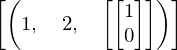

In [201]:
B.eigenvects()

The matrix $B$ is not diagonalizable because it doesn't have a full set of eigenvectors.
To diagonalize a $2\times 2$ matrix, we need two orthogonal eigenvectors but $B$ has only a single eigenvector.
Therefore, we can't construct the matrix of eigenvectors $Q$ (we're missing a column!) 
and so $B$ is not diagonalizable.

Non-square matrices don't have eigenvectors and therefore don't have an eigendecomposition.
Instead, we can use the *singular value decomposition* to break up a non-square matrix $A$ into 
left singular vectors,
right singular vectors, 
and a diagonal matrix of singular values.
Use the `singular_values` method on any matrix to find its singular values.